## <a id="Top" style="color:black;">Top</a>
- [Plotting BH evaporation](#BHevap)
- [Fitting the Lightcurves of GRB candidates](#lightcurves)
- [Expanding to other sources](#candidates)
- [Batch fit all sources with a GBM or LLE t90 less than 2s](#batchfit2s)

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import ultranest

from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, norm

from threeML import *

silence_warnings()
%matplotlib inline
from jupyterthemes import jtplot

jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()

from threeML.io.package_data import get_path_of_data_file

import warnings
warnings.simplefilter("ignore")

Welcome to JupyROOT 6.22/02


18:38:22 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=318273;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=188378;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/functions.py#49\49]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=862545;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=462068;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/functions.py#70\70]8;;\
                  will not be available.                                                                           

18:38:23 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=830204;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=899048;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/absorption.py#37\37]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=927564;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=70067;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py#706\706]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=729353;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=937571;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py#706\706]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=231338;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=213393;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py#706\706]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=517767;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=279161;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py#706\706]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=949751;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=295348;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py#706\706]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=748714;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=252509;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/astromodels/core/parameter.py#706\706]8;;\

18:38:24 INFO      Starting 3ML!                                                                     ]8;id=323500;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=782403;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#31\31]8;;\

18:38:27 WARNING   Multinest minimizer not available                                           ]8;id=290843;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=759739;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=387593;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=866691;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

18:38:27 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=351585;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=560343;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#80\80]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=374226;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=48078;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#130\130]8;;\
                  software installed and configured?                                                               

18:38:31 WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=45814;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=423695;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#343\343]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=474833;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=329587;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#343\343]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=771082;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=843340;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#343\343]8;;\
                  performances in 3ML                                                                              

In [83]:
# EBH Plotting
def afterglow(tau, delta, t_m, t_p, normalization):
    """
    Afterglow model.
    """
    # lifetime only, no spectrum.
    # Norm * \frac{e^{(-t -\Delta)/tp } }{1 - e^{(-t - \Delta)/tm} }
    return normalization* ( 
        np.exp(-(1/t_p)*(tau - delta)) /
        (1 + np.exp(-(1/t_m)*(tau - delta))) )

# Simplifying lightcurve with powerlaw of index -.52
def simplified_lightcurve(tau, normalization = 1., index = .52, delta=0):
    """
    Simplified lightcurve model.

    Form 
    """
    f = normalization*(-tau + delta)**(-index)
    for i, val in enumerate(f):
        if np.isnan(val) or np.isinf(val):
            break
    f[i:] = 0
    return f

### <a id="BHevap" style="color:black;">Plotting BH evaporation</a>
[back to top](#Top)

In [3]:
#GBM Energy Spectrum
Emin = 50*10**(-6) # GeV
Emax = 300*10**(-6) # GeV

"""
def afterglow(tau, delta, t_m, t_p, normalization):
    """
    #Afterglow model.
    """
    # lifetime only, no spectrum.
    # Norm * \frac{e^{(-t -\Delta)/tp } }{1 - e^{(-t - \Delta)/tm} }
    return normalization* ( 
        np.exp(-(1/t_p)*(tau - delta)) /
        (1 + np.exp(-(1/t_m)*(tau - delta))) )

# Simplifying lightcurve with powerlaw of index -.52
def simplified_lightcurve(tau, normalization = 1., index = .52, delta=0):
    """
    #Simplified lightcurve model.

    #Form 
    """
    f = normalization*(-tau + delta)**(-index)
    for i, val in enumerate(f):
        if np.isnan(val) or np.isinf(val):
            break
    f[i:] = 0
    return f
"""

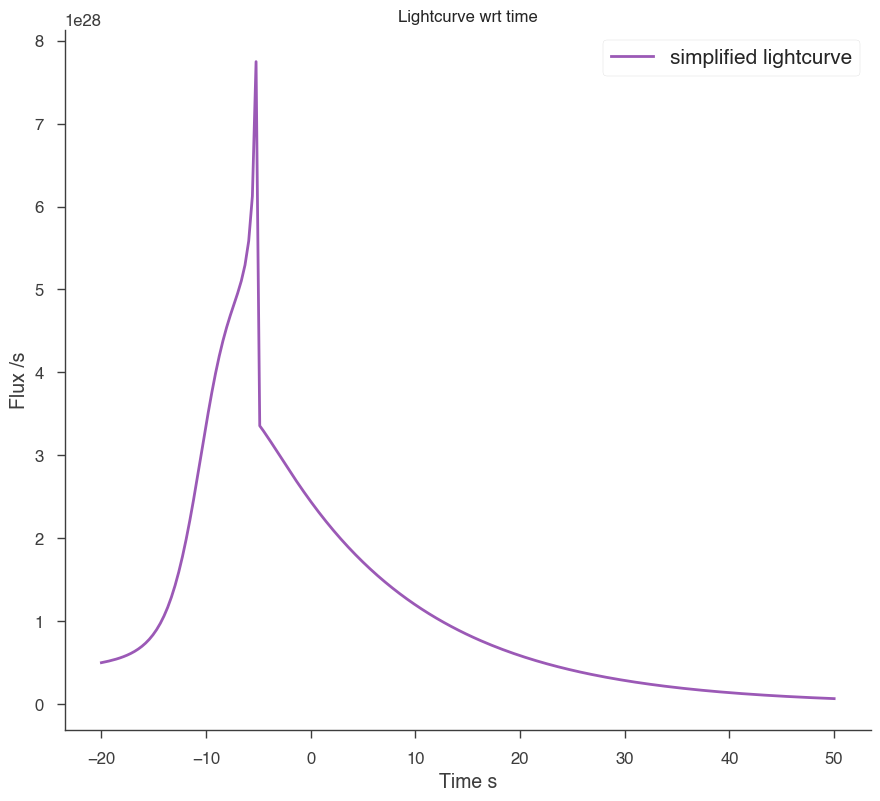

In [63]:
tau = np.linspace(-20,50,200)

curve = np.zeros(200)

fig, ax = plt.subplots()

curve = curve + simplified_lightcurve(tau, normalization = 2*1e28, delta = -5)

curve = curve + afterglow(tau, -10, 1.5, 14, 5*1e28)

ax.plot(tau, curve, label = 'simplified lightcurve')

#ax.set_xlim(30,-30)

ax.set_xlabel("Time s")
ax.set_ylabel("Flux /s")
ax.set_title("Lightcurve wrt time")
ax.legend(prop={'size':15})
plt.show()

### <a id="lightcurves" style="color:black;">Fitting the Blackhawk Lightcurves</a>
[back to top](#Top)

In [326]:
# Import & fit Blackhawk theoretical lightcurves.

theory = pd.read_csv('../Modelling/Blackhawk/t90_hardness_ratio/hardnessratios.tex', sep='\t')

# Get data for the last 300s
theory = theory.loc[theory['Time to Death']<300]

time = theory['Time to Death']
data = theory['EdndE-200keV']

# Reset to x-axis
data -= data.min()

time = time*-1

In [334]:
# Let's fit data just for the 200keV and 200GeV lines.

simplified_model = lambda params: simplified_lightcurve(tau = time, normalization=params[0], index=params[1], delta=params[2])
poisson_likelihood_model = lambda params: -0.5 * ((
    (simplified_model(params) - data)
    /(0.5*data.mean())) **2).sum()


def prior_theory(cube):
    params = cube.copy()

    # lc_K: uniform
    lo = 1e-7
    hi = 1e-11
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    params[1] = norm.ppf(cube[1], .52, 1)

    # lc_delta: gaussian on the time w peak index
    params[2] = norm.ppf(cube[2], -1, 1)

    return params

In [335]:
sampler = ultranest.ReactiveNestedSampler(['lc_k', 'lc_index', 'lc_delta'], poisson_likelihood_model, prior_theory)#simple_likelihood_model, prior_simple)#

result = sampler.run()
sampler.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01   [-13.8154..-13.8152]*| it/evals=6845/51355 eff=13.4334% N=400       0 0   
[ultranest] Likelihood function evaluations: 51363
[ultranest]   logZ = -26.21 +- 0.1426
[ultranest] Effective samples strategy satisfied (ESS = 1954.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.14 tail:0.01 total:0.14 required:<0.50
[ultranest] done iterating.

logZ = -26.227 +- 0.329
  single instance: logZ = -26.227 +- 0.163
  bootstrapped   : logZ = -26.206 +- 0.329
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    lc_k                : 0.00000000168│▁▁▁▂▃▅▆▇▇▇▇▆▄▄▃▂▂▁▁▁▁▁▁▁  ▁▁▁▁▁   ▁ ▁ ▁│0.00000000560    0.00000000269 +- 0.00000000041
    lc_index            : 0.009 │ ▁▁▁▁▃▄▆▇▇▇▇▇▆▄▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▁▁▁▁ │0.896     0.276 +- 

-12.849151637104411


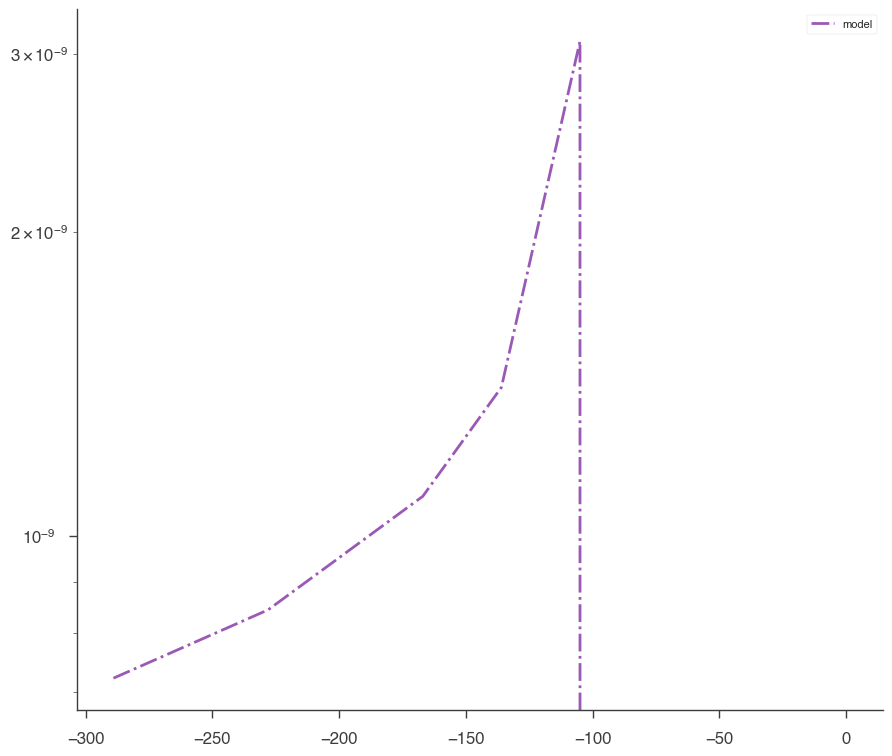

In [344]:
fig, ax = plt.subplots()

#ax.scatter(time, data, marker='x', label='data', color='black')

params = (
    0.00000000588, 0.4, -100
)

model = simplified_model(params)

ax.plot(time, model, '-.', label='model')
ax.legend()
ax.set_yscale('log')

print(r2_score(data, model))

### <a id="dl_lc" style="color:black;">Downloading lightcurves</a>
[back to top](#Top)

In [238]:
# Import the new data, fit it with the same plaw+afterglow model

param_names = ['lc_K', 'lc_index', 'lc_delta'] 
#'ag_K', 'ag_t_m', 'ag_t_p', 'ag_delta']

def lightcurve_model(params):

    # Retrieve new parameters
    (lc_K, lc_index, lc_delta, 
    ag_K, ag_t_m, ag_t_p, ag_delta) = params

    # Instantiate blank model
    model = np.zeros(len(data))

    # Create lc from simplified powerlaw model.
    model = model + simplified_lightcurve(tau = time,
     normalization = lc_K, index = lc_index, delta = lc_delta)

    # Create ag.
    model = model + afterglow(tau=time,
     normalization=ag_K, t_m = ag_t_m, t_p = ag_t_p, delta = ag_delta)

    return model

poisson_likelihood_model = lambda params: -0.5 * ((
    (simplified_lightcurve(time, params[0], params[1], params[2]) - data)
    /(1e-2*data)) **2).sum()

likelihood_model = lambda params: -0.5 * ((
    (simplified_lightcurve(time, params[0], params[1], params[2]) - data)
    /(0.01*np.median(data))) **2).sum()

# GRB 140206275

In [273]:
# Load and process data

LAT_14_data = pd.read_csv('../Lightcurve_Download/prelim_top_3_Data/LAT_GRB140206275')

# Select bounds
LAT_signal_bounds = (0.,25.)
LAT_index_bounds = [np.argmin(np.abs(np.array(LAT_14_data['Start'])-i)) for i in LAT_signal_bounds]

# Snippet
time = LAT_14_data['Start'][LAT_index_bounds[0]:LAT_index_bounds[1]].copy()
data = LAT_14_data['Counts'][LAT_index_bounds[0]:LAT_index_bounds[1]].copy()

# Shift down for bkg
LAT_sub = data.min()

# Bring down to min
data -= LAT_sub

# Pack it away for plotting later
LAT_14_selection = {
    'Dataset': LAT_14_data,
    'Time': time,
    'Index bounds': LAT_index_bounds,
    'Min sub': LAT_sub
}

def prior_14_LLE(cube):
    params = cube.copy()
    
    # lc_K: uniform
    lo = 1e1
    hi = 1e3
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    hi = .9
    lo = .4
    params[1] = cube[1] * (hi - lo) + lo

    # lc_delta: gaussian on the time w peak index
    hi = 8
    lo = 10
    params[2] = cube[2] * (hi - lo) + lo

    return params

if True:
    sampler = ultranest.ReactiveNestedSampler(param_names, likelihood_model, prior_14_LLE)

    result = sampler.run()
    sampler.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+05  ..-209868.48 [-209868.6262..-209868.6260]*| it/evals=10640/20919 eff=51.8544% N=400 
[ultranest] Likelihood function evaluations: 20936
[ultranest]   logZ = -2.099e+05 +- 0.1871
[ultranest] Effective samples strategy satisfied (ESS = 2157.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 398 minimum live points (dlogz from 0.16 to 0.52, need <0.5)
[ultranest]   logZ error budget: single: 0.22 bs:0.19 tail:0.01 total:0.19 required:<0.50
[ultranest] done iterating.

logZ = -209890.602 +- 0.520
  single instance: logZ = -209890.602 +- 0.224
  bootstrapped   : logZ = -209890.506 +- 0.520
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    lc_K                : 93.72 │ ▁ ▁▁▁▁▁▁▁▁▂▂▃▄▄▆▆▇▇▇▇▆▆▅▅▄▃▂▂▁▁▁▁▁▁ ▁ │95.23     94.51 +- 0.18
    lc_index            : 0.7518│ ▁ ▁▁▁▁▁▁▂▂▂▃▄▄▅▆▇▇▇▆▆▆▅▄▃▂▂▂▁▁▁▁▁▁

In [266]:
# Load and process data

GBM_14_data = pd.read_csv('../Lightcurve_Download/prelim_top_3_Data/GBM_GRB140206275')

# Select bounds
GBM_signal_bounds = (-5.,40.)
GBM_index_bounds = [np.argmin(np.abs(np.array(GBM_14_data['Start'])-i)) for i in GBM_signal_bounds]

# Snippet
time = GBM_14_data['Start'][GBM_index_bounds[0]:GBM_index_bounds[1]].copy()
data = GBM_14_data['AvgCounts'][GBM_index_bounds[0]:GBM_index_bounds[1]].copy()

# Shift down for bkg
GBM_sub = data.min()

# Bring down to min
data -= GBM_sub

# Pack it away for plotting later
GBM_14_selection = {
    'Dataset': GBM_14_data,
    'Time': time,
    'Index bounds': GBM_index_bounds,
    'Min sub': GBM_sub
}

def prior_14_GBM(cube):
    params = cube.copy()
    
    # lc_K: uniform
    lo = 1e1
    hi = 1e3
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    hi = .9
    lo = .4
    params[1] = cube[1] * (hi - lo) + lo

    # lc_delta: gaussian on the time w peak index
    hi = 10
    lo = 15
    params[2] = cube[2] * (hi - lo) + lo

    return params

if False:
    sampler = ultranest.ReactiveNestedSampler(param_names, likelihood_model, prior_14_GBM)

    result = sampler.run()
    sampler.print_results()

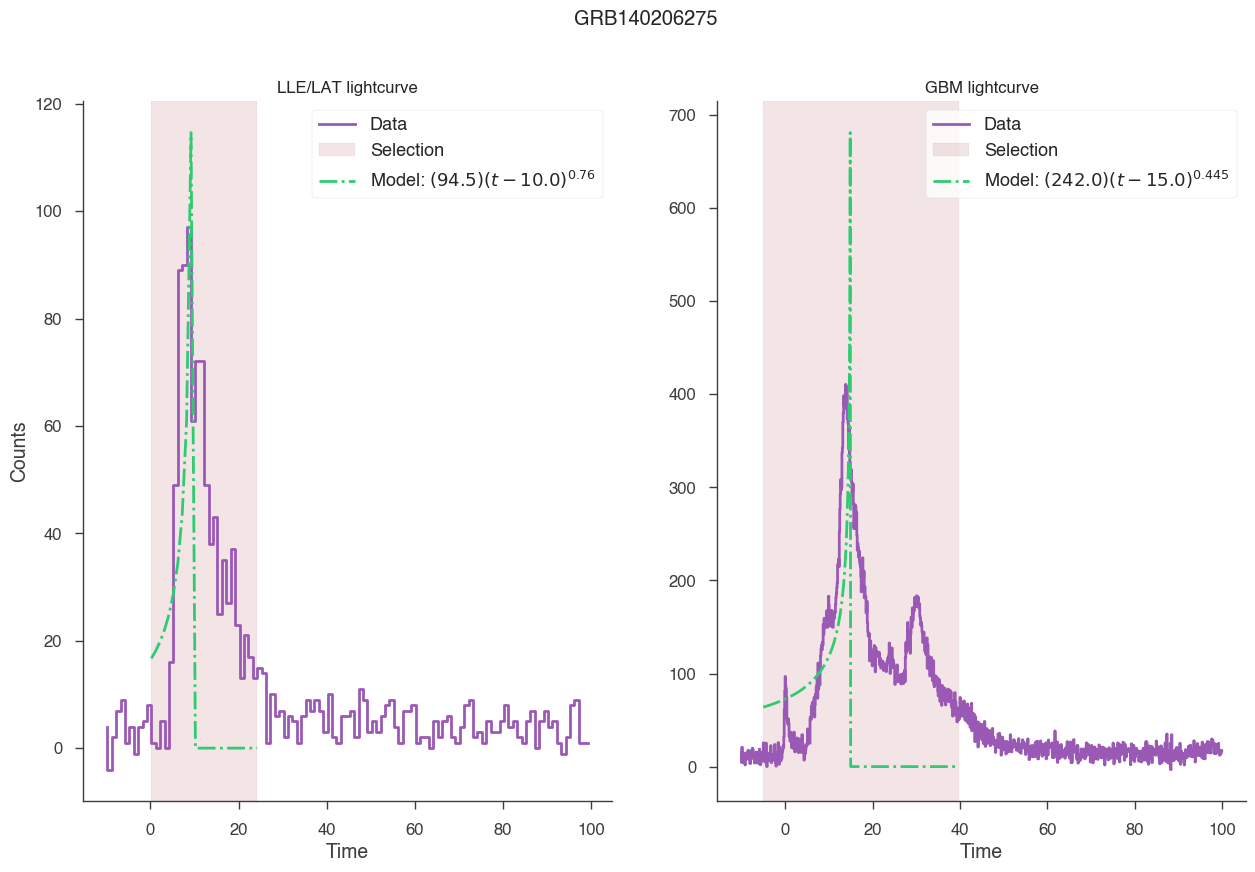

In [351]:
fig, ax = plt.subplots(1,2)

# Plot LLE data
ax[0].step(LAT_14_data['Start'], LAT_14_data['Counts'] - LAT_14_selection['Min sub'], label = 'Data')
ax[0].axvspan(LAT_14_selection['Time'].iloc[0], LAT_14_selection['Time'].iloc[-1], alpha=0.1, color = 'darkred', label = 'Selection')



# Plot GBM data
ax[1].step(GBM_14_data['Start'], GBM_14_data['AvgCounts'] - GBM_14_selection['Min sub'], label = 'Data')
ax[1].axvspan(GBM_14_selection['Time'].iloc[0], GBM_14_selection['Time'].iloc[-1], alpha=0.1, color = 'darkred', label = 'Selection')


# Plot LAT model
model = simplified_lightcurve(LAT_14_selection['Time'], 94.5, 0.76, 10.)#100.5, .771, 10)
labelstr = r'Model: $(%s)(t-%s)^{%s}}$'%(94.5, 10.0, .760)
ax[0].plot(LAT_14_selection['Time'], model, '-.', label = labelstr)

# Plot GBM model 
model = simplified_lightcurve(GBM_14_selection['Time'], 242, 0.445, 15.)#240, .46, 14.99)
labelstr = r'Model: $(%s)(t-%s)^{%s}}$'%(242., 15.0, .445)
ax[1].plot(GBM_14_selection['Time'], model, '-.', label = labelstr)


fig.set_figwidth(15)
ax[0].legend(fontsize=13)
ax[1].legend(fontsize=13)
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_title('LLE/LAT lightcurve')
ax[1].set_title('GBM lightcurve')

fig.suptitle('GRB140206275')
fig.savefig('Fitted_GRB140206275.png', dpi=500)

# GRB 130821674

In [278]:
LAT_13_data = pd.read_csv('../Lightcurve_Download/prelim_top_3_Data/LAT_GRB130821674')

# Select bounds
LAT_signal_bounds = (20.,40.)
LAT_index_bounds = [np.argmin(np.abs(np.array(LAT_13_data['Start'])-i)) for i in LAT_signal_bounds]

# Snippet
time = LAT_13_data['Start'][LAT_index_bounds[0]:LAT_index_bounds[1]].copy()
data = LAT_13_data['Counts'][LAT_index_bounds[0]:LAT_index_bounds[1]].copy()

# Shift down for bkg
LAT_sub = data.min()

# Bring down to min
data -= LAT_sub

# Pack it away for plotting later
LAT_13_selection = {
    'Dataset': LAT_13_data,
    'Time': time,
    'Index bounds': LAT_index_bounds,
    'Min sub': LAT_sub
}

def prior_13_LLE(cube):
    params = cube.copy()
    
    # lc_K: uniform
    lo = 1e1
    hi = 1e3
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    hi = .9
    lo = .4
    params[1] = cube[1] * (hi - lo) + lo

    # lc_delta: gaussian on the time w peak index
    hi = 25
    lo = 35
    params[2] = cube[2] * (hi - lo) + lo

    return params

if True:
    sampler = ultranest.ReactiveNestedSampler(param_names, likelihood_model, prior_13_LLE)

    result = sampler.run()
    sampler.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+05  ..-133554.73 [-133554.8726..-133554.8723]*| it/evals=12000/30725 eff=39.5713% N=400  0  
[ultranest] Likelihood function evaluations: 30740
[ultranest]   logZ = -1.336e+05 +- 0.1604
[ultranest] Effective samples strategy satisfied (ESS = 2197.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest]   logZ error budget: single: 0.24 bs:0.16 tail:0.01 total:0.16 required:<0.50
[ultranest] done iterating.

logZ = -133580.231 +- 0.336
  single instance: logZ = -133580.231 +- 0.242
  bootstrapped   : logZ = -133580.242 +- 0.336
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    lc_K                : 42.493│ ▁▁ ▁▁▁▁▁▁▁▂▃▄▄▅▆▇▇▇▇▇▇▆▅▃▃▂▂▁▁▁▁▁▁▁▁▁ │43.143    42.821 +- 0.076
    lc_index            : 0.7273│ ▁▁▁▁▁▁▁▂▂▃▄▅▆▇▇▇▇▆▆▄▄▃▂▂▁▁▁▁▁▁      ▁ │0.7432    0.7340 +-

In [280]:
# Load and process data

GBM_13_data = pd.read_csv('../Lightcurve_Download/prelim_top_3_Data/GBM_GRB130821674')

# Select bounds
GBM_signal_bounds = (20.,40.)
GBM_index_bounds = [np.argmin(np.abs(np.array(GBM_13_data['Start'])-i)) for i in GBM_signal_bounds]

# Snippet
time = GBM_13_data['Start'][GBM_index_bounds[0]:GBM_index_bounds[1]].copy()
data = GBM_13_data['AvgCounts'][GBM_index_bounds[0]:GBM_index_bounds[1]].copy()

# Shift down for bkg
GBM_sub = data.min()

# Bring down to min
data -= GBM_sub

# Pack it away for plotting later
GBM_13_selection = {
    'Dataset': GBM_13_data,
    'Time': time,
    'Index bounds': GBM_index_bounds,
    'Min sub': GBM_sub
}

def prior_13_GBM(cube):
    params = cube.copy()
    
    # lc_K: uniform
    lo = 1e1
    hi = 1e3
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    hi = .9
    lo = .4
    params[1] = cube[1] * (hi - lo) + lo

    # lc_delta: gaussian on the time w peak index
    hi = 30
    lo = 35
    params[2] = cube[2] * (hi - lo) + lo

    return params

if True:
    sampler = ultranest.ReactiveNestedSampler(param_names, likelihood_model, prior_13_GBM)

    result = sampler.run()
    sampler.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+05  ..-661117.12 [-661117.3883..-661117.3879]*| it/evals=14774/46889 eff=31.7796% N=400   
[ultranest] Likelihood function evaluations: 46900
[ultranest]   logZ = -6.611e+05 +- 0.1818
[ultranest] Effective samples strategy satisfied (ESS = 2329.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.18, need <0.5)
[ultranest]   logZ error budget: single: 0.27 bs:0.18 tail:0.01 total:0.18 required:<0.50
[ultranest] done iterating.

logZ = -661149.653 +- 0.315
  single instance: logZ = -661149.653 +- 0.274
  bootstrapped   : logZ = -661149.660 +- 0.315
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    lc_K                : 189.61│ ▁    ▁▁▁▁▁▁▁▂▂▄▄▅▆▇▇▆▅▅▄▃▂▂▁▁▁▁▁▁   ▁ │190.85    190.25 +- 0.13
    lc_index            : 0.400000│▇▆▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▁   ▁ ▁ │0.400219    0.400020

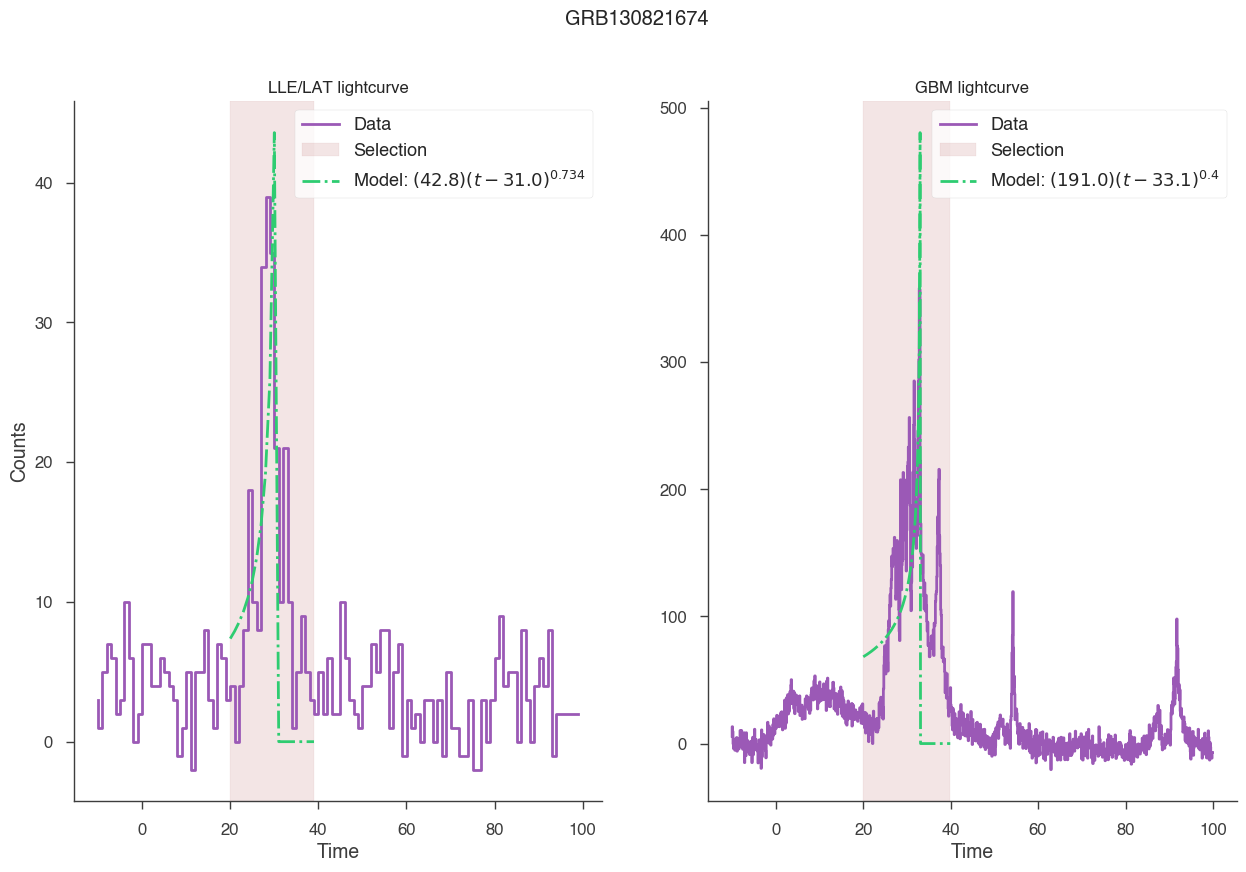

In [349]:
fig, ax = plt.subplots(1,2)

# Plot LLE data
ax[0].step(LAT_13_data['Start'], LAT_13_data['Counts'] - LAT_13_selection['Min sub'], label='Data')
ax[0].axvspan(LAT_13_selection['Time'].iloc[0], LAT_13_selection['Time'].iloc[-1], alpha=0.1, color = 'darkred', label = 'Selection')



# Plot GBM data
ax[1].step(GBM_13_data['Start'], GBM_13_data['AvgCounts'] - GBM_13_selection['Min sub'], label = 'Data')
ax[1].axvspan(GBM_13_selection['Time'].iloc[0], GBM_13_selection['Time'].iloc[-1], alpha=0.1, color = 'darkred', label = 'Selection')


# Plot LAT model
model = simplified_lightcurve(LAT_13_selection['Time'], 42.8, .734, 31.)
labelstr = r'Model: $(%s)(t-%s)^{%s}}$'%(42.8, 31.0, .734)#, r2_score(GBM_10_selection['Data'], model))
ax[0].plot(LAT_13_selection['Time'], model, '-.', label = labelstr)

# Plot GBM model 
model = simplified_lightcurve(GBM_13_selection['Time'], 191., 0.40, 33.1)#205., .426, 33.1)
labelstr = r'Model: $(%s)(t-%s)^{%s}$'%(191., 33.1, .400)
ax[1].plot(GBM_13_selection['Time'], model, '-.', label = labelstr)


fig.set_figwidth(15)
ax[0].legend(fontsize=13)
ax[1].legend(fontsize=13)
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_title('LLE/LAT lightcurve')
ax[1].set_title('GBM lightcurve')

fig.suptitle('GRB130821674')
fig.savefig('Fitted_GRB130821674.png', dpi=500)

# GRB 100116897

In [292]:
### For the LLE
LAT_10_data = pd.read_csv('../Lightcurve_Download/prelim_top_3_Data/LAT_GRB100116897')

# Select bounds
LAT_signal_bounds = (0.,0.)
LAT_index_bounds = [np.argmin(np.abs(np.array(LAT_10_data['Start'])-i)) for i in LAT_signal_bounds]

# Snippet
time = LAT_10_data['Start'][LAT_index_bounds[0]:LAT_index_bounds[1]].copy()
data = LAT_10_data['Counts'][LAT_index_bounds[0]:LAT_index_bounds[1]].copy()

# Shift down for bkg
LAT_sub = data.min()

# Bring down to min
data -= LAT_sub

# Pack it away for plotting later
LAT_10_selection = {
    'Dataset': LAT_10_data,
    'Time': time,
    'Index bounds': LAT_index_bounds,
    'Min sub': LAT_sub
}


### For the GBM
GBM_10_data = pd.read_csv('../Lightcurve_Download/prelim_top_3_Data/GBM_GRB100116897')

# Select bounds
GBM_signal_bounds = (-5.,10.)
GBM_index_bounds = [np.argmin(np.abs(np.array(GBM_10_data['Start'])-i)) for i in GBM_signal_bounds]

# Snippet
time = GBM_10_data['Start'][GBM_index_bounds[0]:GBM_index_bounds[1]].copy()
data = GBM_10_data['AvgCounts'][GBM_index_bounds[0]:GBM_index_bounds[1]].copy()

# Shift down for bkg
GBM_sub = data.min()

# Bring down to min
data -= GBM_sub

GBM_10_selection = {
    'Dataset': GBM_10_data,
    'Time': time,
    'Data': data,
    'Index bounds': GBM_index_bounds,
    'Min sub': GBM_sub
}

def prior_10_GBM(cube):
    params = cube.copy()
    
    # lc_K: uniform
    lo = 1e1
    hi = 1e3
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    hi = .9
    lo = .4
    params[1] = cube[1] * (hi - lo) + lo

    # lc_delta: gaussian on the time w peak index
    hi = -5
    lo = 10
    params[2] = cube[2] * (hi - lo) + lo

    return params

if False:
    sampler = ultranest.ReactiveNestedSampler(param_names, likelihood_model, prior_10_GBM)

    result = sampler.run()
    sampler.print_results()

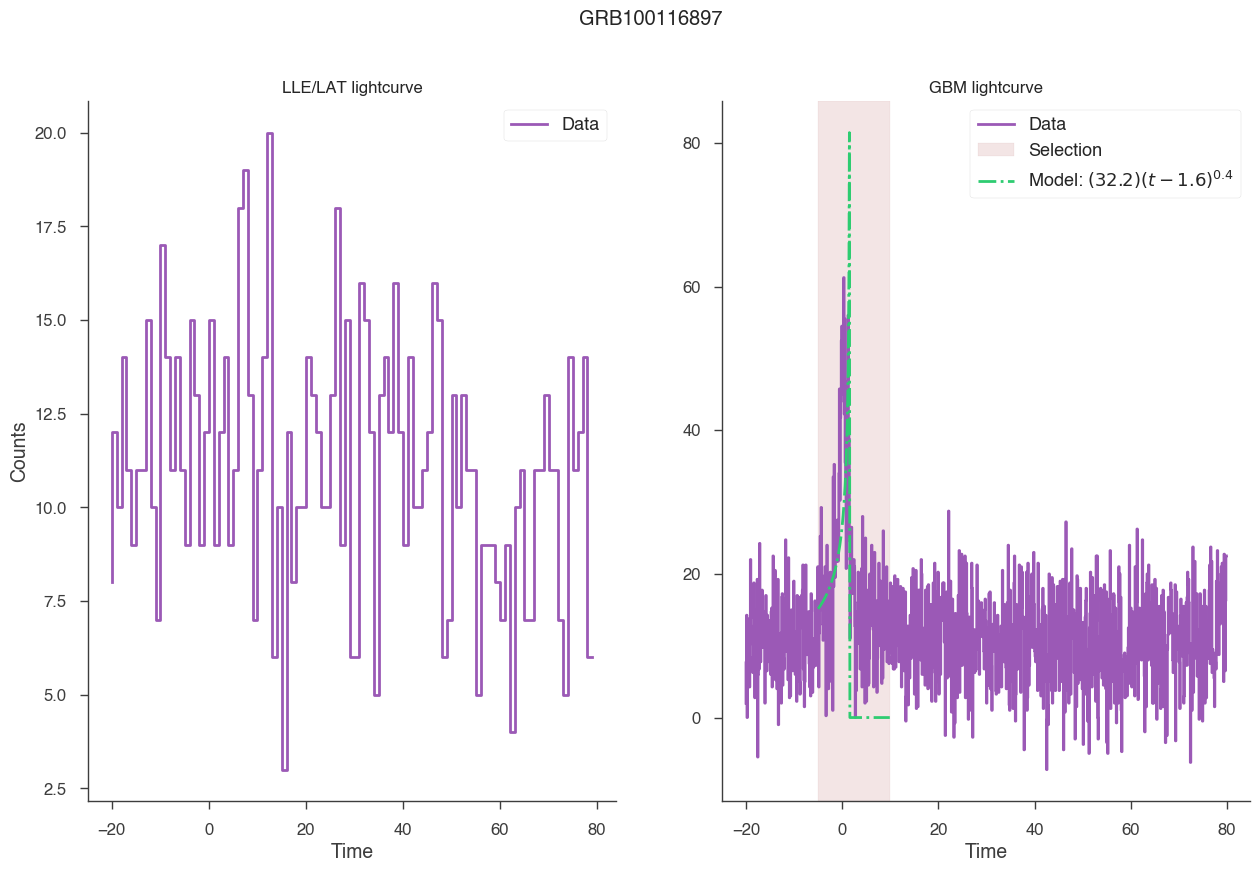

In [350]:
fig, ax = plt.subplots(1,2)

# Plot LLE data
ax[0].step(LAT_10_data['Start'], LAT_10_data['Counts'], label = 'Data')# - LAT_10_selection['Min sub'])
#ax[0].axvspan(LAT_14_selection['Time'].iloc[0], LAT_14_selection['Time'].iloc[-1], alpha=0.1, color = 'darkred')

# Plot GBM data
ax[1].step(GBM_10_data['Start'], GBM_10_data['AvgCounts'] - GBM_10_selection['Min sub'], label = 'Data')
ax[1].axvspan(GBM_10_selection['Time'].iloc[0], GBM_10_selection['Time'].iloc[-1], alpha=0.1, color = 'darkred', label = 'Selection')


# Plot LAT model
#model = simplified_lightcurve(LAT_10_selection['Time'], 94.5, 0.76, 10.)#100.5, .771, 10)
#ax[0].plot(LAT_10_selection['Time'], model, '-.', label='model')

# Plot GBM model 
model = simplified_lightcurve(GBM_10_selection['Time'], 32.2, .40, 1.6)
labelstr = r'Model: $(%s)(t-%s)^{%s}}$'%(32.2, 1.60, .400)#, r2_score(GBM_10_selection['Data'], model))
ax[1].plot(GBM_10_selection['Time'], model, '-.', label = labelstr)
ax[1].legend()

fig.set_figwidth(15)
ax[0].legend(fontsize=13)
ax[1].legend(fontsize=13)
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_title('LLE/LAT lightcurve')
ax[1].set_title('GBM lightcurve')

fig.suptitle('GRB100116897')
fig.savefig('Fitted_GRB100116897.png', dpi=500)

-----
### Further investigation into the top 3

pre- and after-glow (ag) -- let the fit decide where the afterglow peak is

7-parameter problem: lc_norm, lc_index, lc_location, ag_norm, ag_A, ag_B, ag_delta


normalization should be similar for both lc and ag

check goodness-of-fit of lc without ag to contrast




Stefano is going to use Blackhawc to redo PBH calculations for T90 and Hardness


In [110]:
df = pd.read_csv('./../GBM_Catalog_Searching/BOTH_T90_in_[0.2-5].csv')

data_directory = './~100ms_Source_Data/'

param_names = ['lc_K', 'lc_index', 'lc_delta', 
'ag_K', 'ag_t_m', 'ag_t_p', 'ag_delta']

def lightcurve_model(params):

    # Retrieve new parameters
    (lc_K, lc_index, lc_delta, 
    ag_K, ag_t_m, ag_t_p, ag_delta) = params

    # Instantiate blank model
    model = np.zeros(len(data))

    # Create lc from simplified powerlaw model.
    model = model + simplified_lightcurve(tau = time,
     normalization = lc_K, index = lc_index, delta = lc_delta)

    # Create ag.
    model = model + afterglow(tau=time,
     normalization=ag_K, t_m = ag_t_m, t_p = ag_t_p, delta = ag_delta)

    return model

simplified_model = lambda params: simplified_lightcurve(tau = time, normalization=params[0], index=params[1], delta=params[2])

def likelihood_model(params):
    
    curve = lightcurve_model(params)
    
    like = -0.5 * (((curve - data)/1e2)**2).sum()
    #like = pearsonr(data,curve)[0]
    return like

simple_likelihood_model = lambda params: -0.5*(((simplified_model(params)-data)/np.mean(data)*.1)**2).sum()

In [113]:
GRBNAME = 'GRB141222298'

# GRB info
select = df.query('name == @GRBNAME')
time_in = select['time_in'].iloc[0]
time_out = select['time_out'].iloc[0]
#dets = select['detectors'].iloc[0]

# Choose resolution & retrieve data
dt = 0.1
selected = pd.read_csv('%s%s_%s_to_%s_resolution_%s.csv'%(data_directory, GRBNAME, time_in, time_out, dt))

# Use the following as global variables.
time, data, dets = merge_lightcurves(selected)
peak_index = list(data).index(max(data))

# Let's narrow down the band of the signal ( by selecting the T90? )
in_index = list(time).index(-1)
out_index = list(time).index(4)
time = time[in_index:out_index]
data = data[in_index:out_index]

# Create Likelihood evaluation fcn.
poisson_likelihood_model = lambda params: -0.5 * ((
    (lightcurve_model(params) - data)
    /(0.5*data)) **2).sum()

# Define priors.
def prior_1412(cube):
    params = cube.copy()
    
    # lc_K: uniform
    lo = 1000
    hi = 1500
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    hi = .9
    lo = .4
    params[1] = cube[1] * (hi - lo) + lo

    # lc_delta: gaussian on the time w peak index
    hi = .2
    lo = -.1
    params[2] = cube[2] * (hi - lo) + lo
    
    # ag_K: uniform
    lo = 7*1e3
    hi = 1e4
    params[3] = cube[3] * (hi - lo) + lo
    
    # ag_t_m: uniform
    lo = 1e-3
    hi = 1e-1
    params[4] = cube[4] * (hi - lo) + lo
    
    # ag_t_p: uniform
    lo = params[4]
    hi = .7 # t_p > t_m
    params[5] = cube[5] * (hi - lo) + lo
    
    # ag_delta: uniform
    hi = .7
    lo = 0
    params[2] = cube[2] * (hi - lo) + lo
    
    return params

def prior_simple(cube):
    params = cube.copy()

    # lc_K: uniform
    lo = 1e2
    hi = 1e4
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    params[1] = norm.ppf(cube[1], .52, 1)

    # lc_delta: gaussian on the time w peak index
    params[2] = norm.ppf(cube[1], -time[peak_index], 1)

    return params

#param_names = ['lc_K', 'lc_index', 'lc_delta']

In [115]:
sampler = ultranest.ReactiveNestedSampler(param_names, poisson_likelihood_model, prior_1412)#simple_likelihood_model, prior_simple)#

result = sampler.run()
sampler.print_results()

[ultranest] Sampling 400 live points from prior ...


KeyboardInterrupt: 

0.7134216172757318


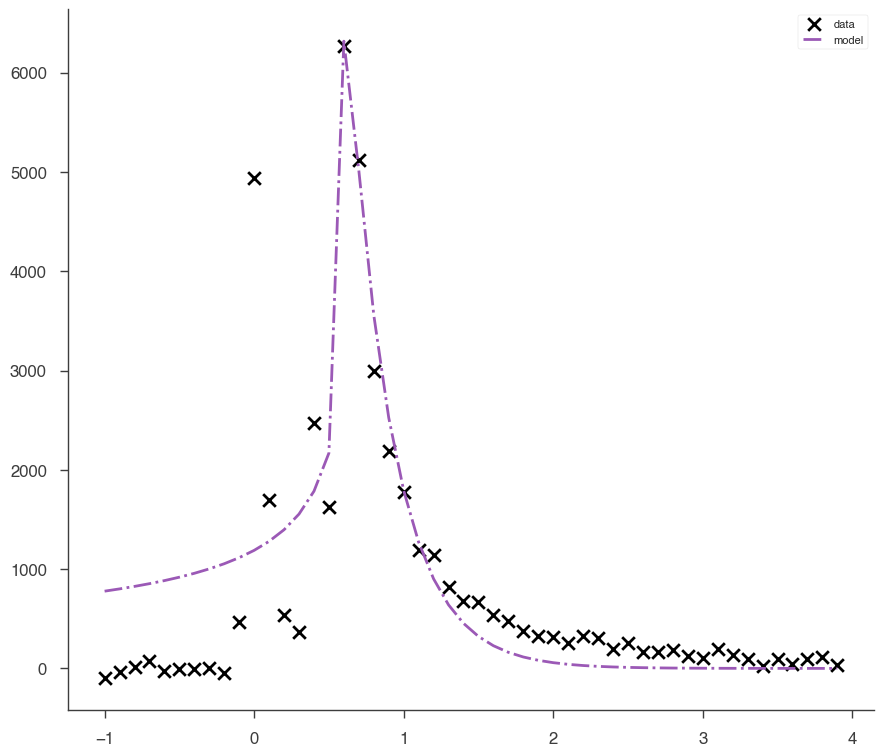

In [18]:
fig, ax = plt.subplots()

ax.scatter(time, data, marker='x', label='data', color='black')

params = (
    #1253, .63, .1, 9500, .051, .35, .5
    1001.6, .477, .6979, 7039, .0091, .2914, .6013
)

model = lightcurve_model(params)
#model = simplified_lightcurve(tau = time, normalization=1218, index=.52, delta=-.74)

ax.plot(time, model, '-.', label='model')
ax.legend()

print(r2_score(data, model))

In [19]:
GRBNAME = 'GRB131014215'

# GRB info
select = df.query('name == @GRBNAME')
time_in = select['time_in'].iloc[0]
time_out = select['time_out'].iloc[0]
#dets = select['detectors'].iloc[0]

# Choose resolution & retrieve data
dt = 0.1
selected = pd.read_csv('%s%s_%s_to_%s_resolution_%s.csv'%(data_directory, GRBNAME, time_in, time_out, dt))

# Use the following as global variables.
time, data, dets = merge_lightcurves(selected)
peak_index = list(data).index(max(data))

# Let's narrow down the band of the signal ( by selecting the T90? )
in_index = list(time).index(-1)
out_index = list(time).index(8)
time = time[in_index:out_index]
data = data[in_index:out_index]

# Define priors.
def prior_1310(cube):
    params = cube.copy()
    
    # lc_K: uniform
    lo = 1000
    hi = 5000
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    hi = .9
    lo = .4
    params[1] = cube[1] * (hi - lo) + lo

    # lc_delta: gaussian on the time w peak index
    hi = 2
    lo = 1
    params[2] = cube[2] * (hi - lo) + lo
    
    # ag_K: uniform
    lo = 1e5
    hi = 1e4
    params[3] = cube[3] * (hi - lo) + lo
    
    # ag_t_m: uniform
    lo = 1e-3
    hi = 1e-1
    params[4] = cube[4] * (hi - lo) + lo
    
    # ag_t_p: uniform
    lo = params[4]
    hi = 2 # t_p > t_m
    params[5] = cube[5] * (hi - lo) + lo
    
    # ag_delta: uniform
    hi = 2
    lo = 1
    params[2] = cube[2] * (hi - lo) + lo
    
    return params

In [10]:
sampler = ultranest.ReactiveNestedSampler(param_names, likelihood_model, prior_1310)#simple_likelihood_model, prior_simple)#

result = sampler.run()
sampler.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+05  -99120.20 [-99121.2268..-99121.2263]*| it/evals=26680/332269 eff=8.0393% N=400    
[ultranest] Likelihood function evaluations: 332276
[ultranest]   logZ = -9.918e+04 +- 0.3171
[ultranest] Effective samples strategy satisfied (ESS = 3582.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 398 minimum live points (dlogz from 0.27 to 0.69, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.32 tail:0.01 total:0.32 required:<0.50
[ultranest] done iterating.

logZ = -99183.069 +- 0.694
  single instance: logZ = -99183.069 +- 0.379
  bootstrapped   : logZ = -99183.064 +- 0.694
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    lc_K                : 1000.00│▇▆▄▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▁ ▁    ▁ │1002.57    1000.21 +- 0.21
    lc_index            : 0.89498│ ▁  ▁▁ ▁ ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂

0.7021865837985328


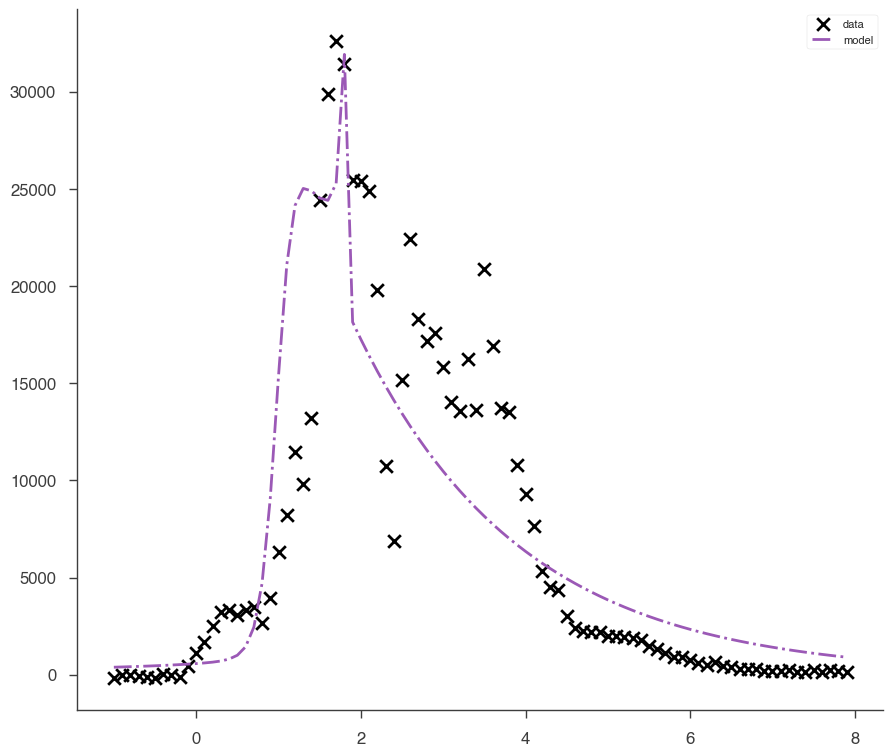

In [20]:
fig, ax = plt.subplots()

ax.scatter(time, data, marker='x', label='data', color='black')

params = (
    #3500, .7, 1.8, 3.5*1e4, .1, 1.3, 1.7
    1000.21, .89953, 1.85853, 28460, .0999944, 1.999973, .999954
)

model = lightcurve_model(params)
#model = simplified_lightcurve(tau = time, normalization=1218, index=.52, delta=-.74)

ax.plot(time, model, '-.', label='model')
ax.legend()

print(r2_score(data, model))

In [60]:
GRBNAME = 'GRB140102887'

# GRB info
select = df.query('name == @GRBNAME')
time_in = select['time_in'].iloc[0]
time_out = select['time_out'].iloc[0]
#dets = select['detectors'].iloc[0]

# Choose resolution & retrieve data
dt = 0.1
selected = pd.read_csv('%s%s_%s_to_%s_resolution_%s.csv'%(data_directory, GRBNAME, time_in, time_out, dt))

# Use the following as global variables.
time, data, dets = merge_lightcurves(selected)
peak_index = list(data).index(max(data))

# Let's narrow down the band of the signal ( by selecting the T90? )
in_index = list(time).index(-2)
out_index = list(time).index(8)
time = time[in_index:out_index]
data = data[in_index:out_index]

# Define priors.
def prior_1401(cube):
    params = cube.copy()
    
    # lc_K: uniform
    lo = 500
    hi = 2000
    params[0] = cube[0] * (hi - lo) + lo

    # lc_index: gaussian on -.52 
    lo = .4
    hi = .9
    params[1] = cube[1] * (hi - lo) + lo

    # lc_delta: gaussian on the time w peak index
    lo = .6
    hi = .9
    params[2] = cube[2] * (hi - lo) + lo
    
    # ag_K: uniform
    lo = 1e2
    hi = 1e4
    params[3] = cube[3] * (hi - lo) + lo
    
    # ag_t_m: uniform
    lo = 1e-3
    hi = .3
    params[4] = cube[4] * (hi - lo) + lo
    
    # ag_t_p: uniform
    lo = params[4]
    hi = 1 # t_p > t_m
    params[5] = cube[5] * (hi - lo) + lo
    
    # ag_delta: uniform
    hi = 2.5
    lo = 2
    params[2] = cube[2] * (hi - lo) + lo
    
    return params

In [91]:
sampler = ultranest.ReactiveNestedSampler(param_names, likelihood_model, prior_1401)

result = sampler.run()
sampler.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+03  094.35 [-6095.0291..-6095.0290]*| it/evals=15430/230938 eff=6.6930% N=400 
[ultranest] Likelihood function evaluations: 230939
[ultranest]   logZ = -6129 +- 0.1963
[ultranest] Effective samples strategy satisfied (ESS = 3169.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 398 minimum live points (dlogz from 0.17 to 0.50, need <0.5)
[ultranest]   logZ error budget: single: 0.27 bs:0.20 tail:0.01 total:0.20 required:<0.50
[ultranest] done iterating.

logZ = -6128.810 +- 0.502
  single instance: logZ = -6128.810 +- 0.274
  bootstrapped   : logZ = -6128.744 +- 0.502
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    lc_K                : 500   │▁▁▁▁▂▂▂▃▄▅▆▆▇▇▇▇▆▅▄▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁  ▁▁ │597       536 +- 12
    lc_index            : 0.8319│ ▁        ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▃▃▄▄▅▆▇│0.9000    0.8922 +-

0.6


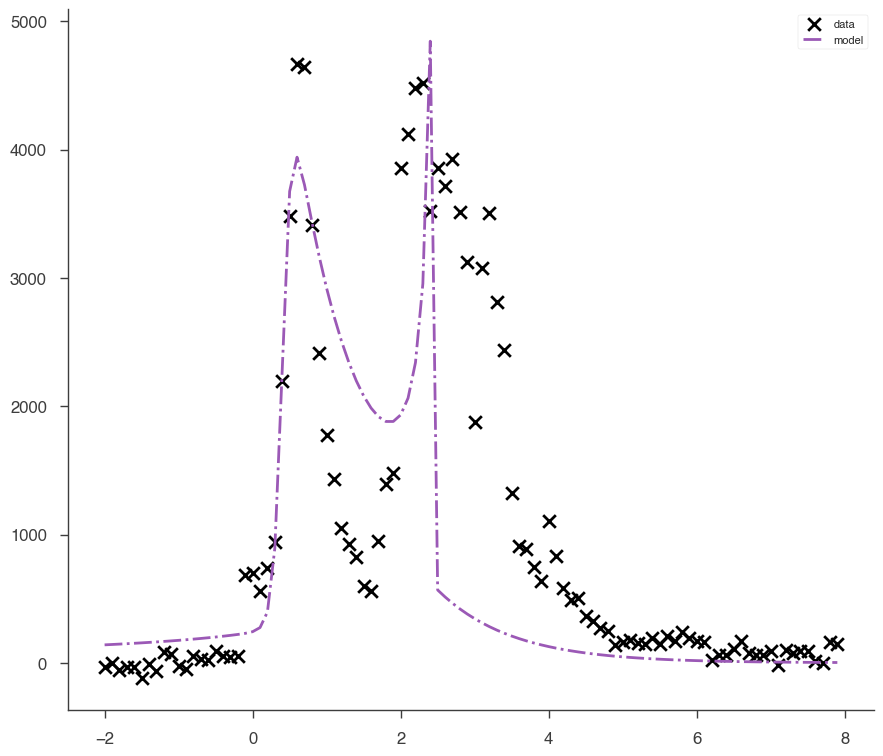

In [61]:
fig, ax = plt.subplots()

ax.scatter(time, data, marker='x', label='data', color='black')

params = (
    #1000, .7, .8, 8800, .2, .6, 2.3
    536, .892, 2.499, 4566, .0589, .9995, .4159
)

model = lightcurve_model(params)
#model = simplified_lightcurve(tau = time, normalization=1218, index=.52, delta=-.74)

ax.plot(time, model, '-.', label='model')
ax.legend()
print(time[peak_index])